In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm


In [15]:
cd /mnt/d/AI/Algerian Forest Fire Prediction

/mnt/d/AI/Algerian Forest Fire Prediction


In [18]:
df = pd.read_csv('data/raw/Algerian_forest_fires.csv')

In [19]:
# 1. Data Exploration and Preprocessing
# Convert 'Classes' column to binary 
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)

In [ ]:
# Feature Engineering
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['day'] = df['day'].astype(int)

In [20]:
# Feature Generation
# Create new features based on existing ones
df['Temp_RH'] = df['Temperature'] * df['RH']
df['Wind_Rain'] = df['Ws'] * df['Rain']


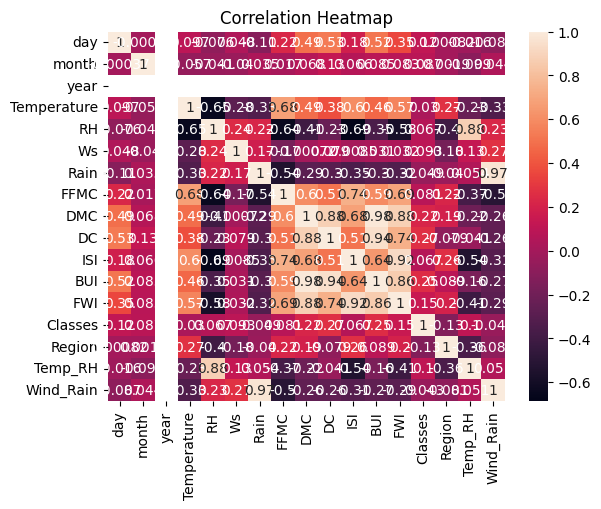

In [21]:
# Exploratory Data Analysis (EDA)
# Visualize relationships between variables
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp_RH,Wind_Rain
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.016461,0.497942,1959.864198,12.783128
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.127502,0.501028,381.527565,38.277493
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000,819.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000,1673.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,0.000000,1984.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,0.000000,1.000000,2211.000000,7.800000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000,2916.000000,352.800000


In [24]:
# Fire vs. No Fire Counts
print("\nFire vs. No Fire Counts:")
print(df['Classes'].value_counts())


Fire vs. No Fire Counts:
Classes
0    239
1      4
Name: count, dtype: int64


In [25]:
# Month-wise Fire Occurrence
print("\nMonth-wise Fire Occurrence:")
print(df.groupby('month')['Classes'].sum())


Month-wise Fire Occurrence:
month
6    0
7    0
8    3
9    1
Name: Classes, dtype: int64


In [26]:
# Region-wise Fire Occurrence
print("\nRegion-wise Fire Occurrence:")
print(df.groupby('Region')['Classes'].sum())


Region-wise Fire Occurrence:
Region
0    4
1    0
Name: Classes, dtype: int64


In [27]:
# Correlation Matrix
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                  day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.35

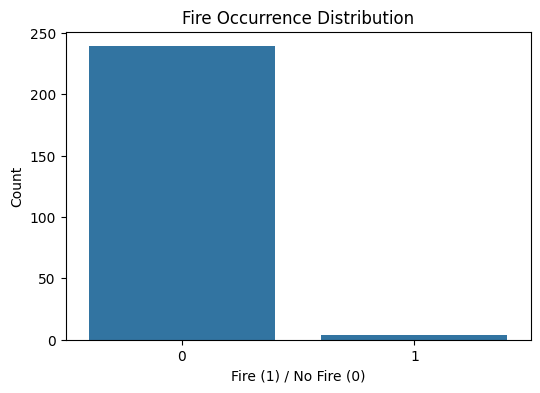

In [28]:
# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Classes', data=df)
plt.title('Fire Occurrence Distribution')
plt.xlabel('Fire (1) / No Fire (0)')
plt.ylabel('Count')
plt.show()


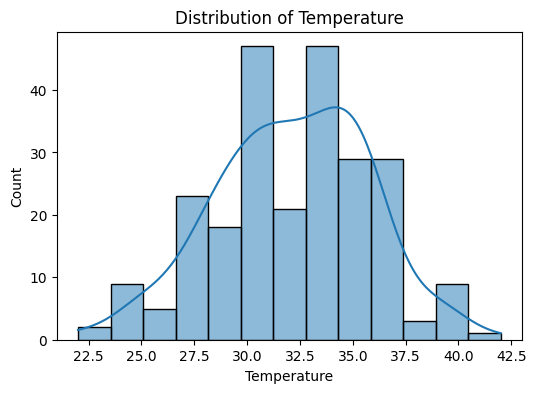

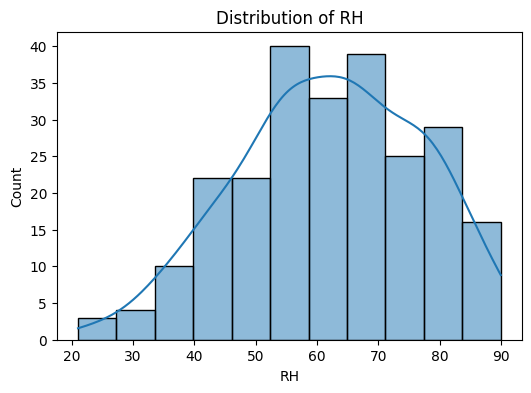

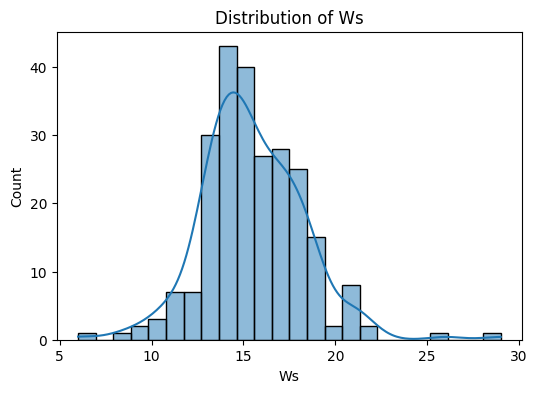

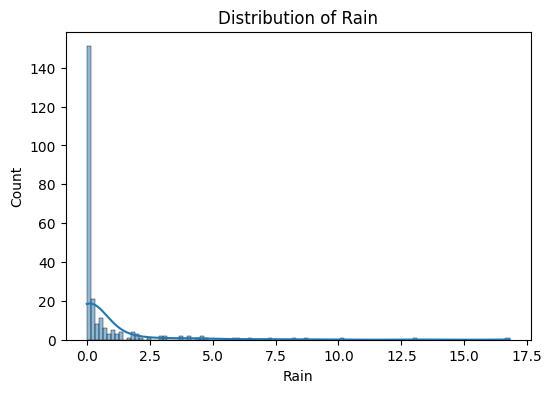

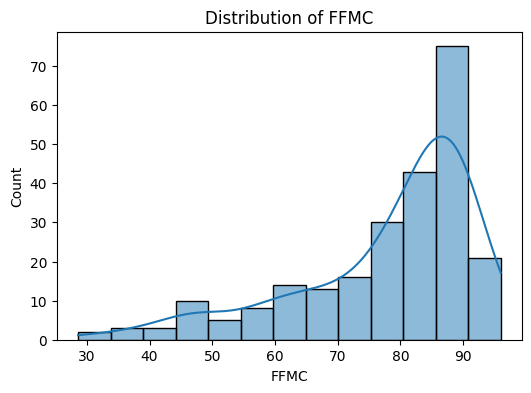

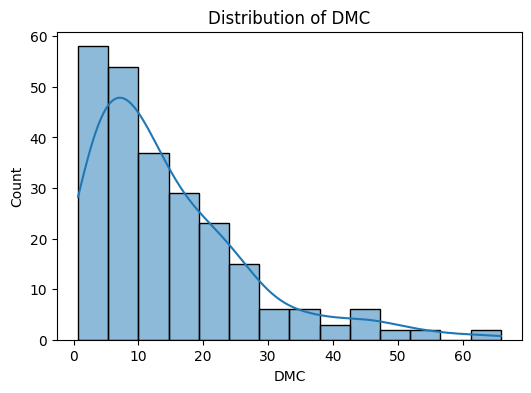

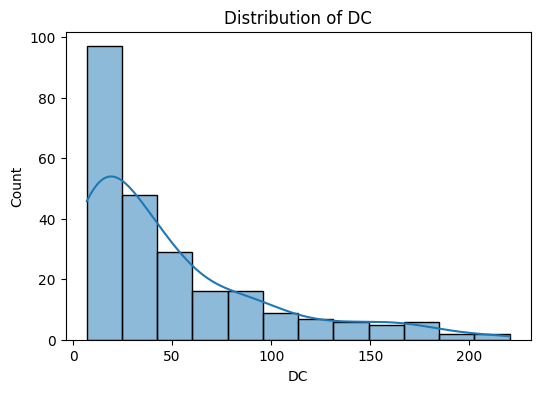

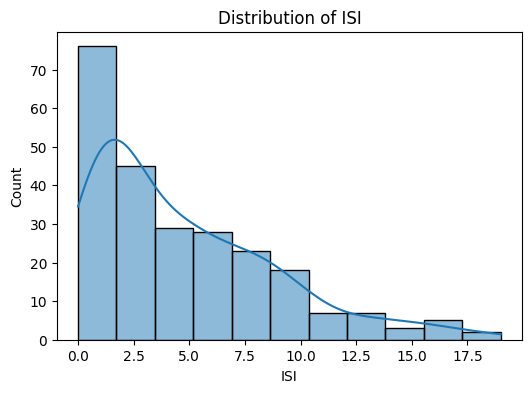

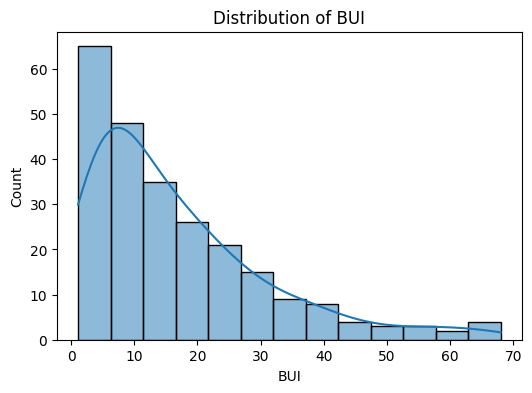

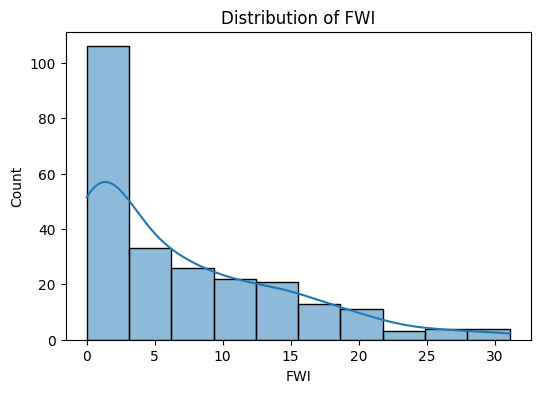

In [29]:

# 2. Distribution of Numerical Features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=feature, data=df, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


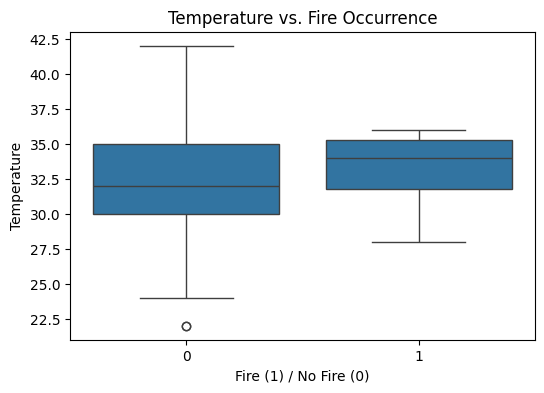

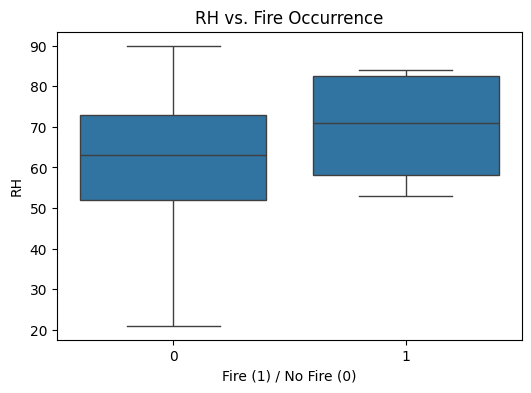

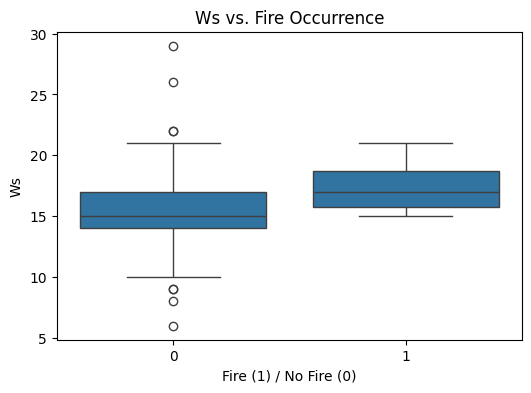

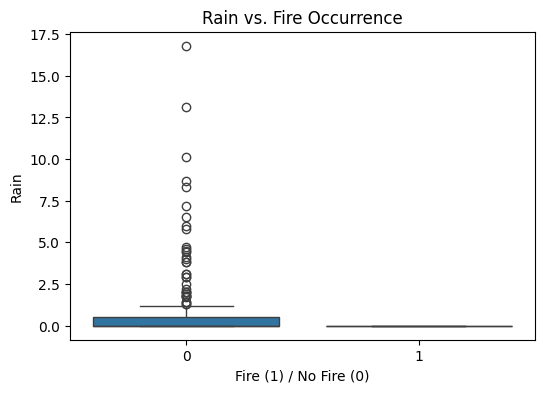

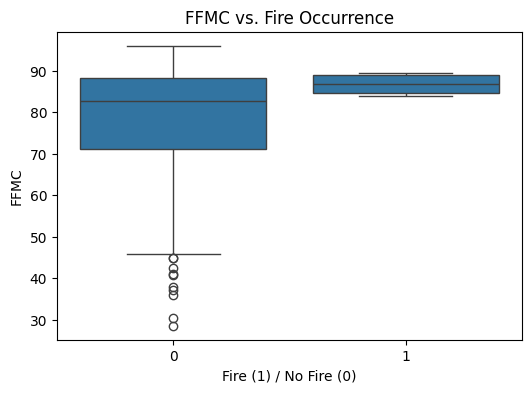

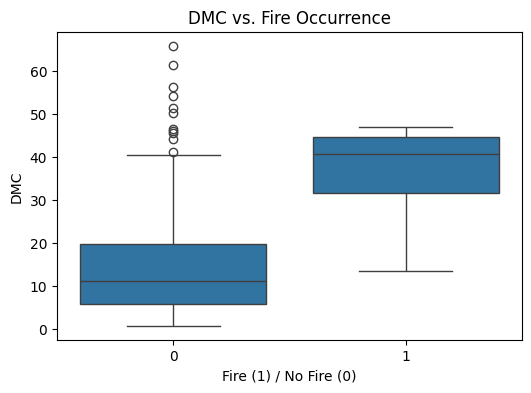

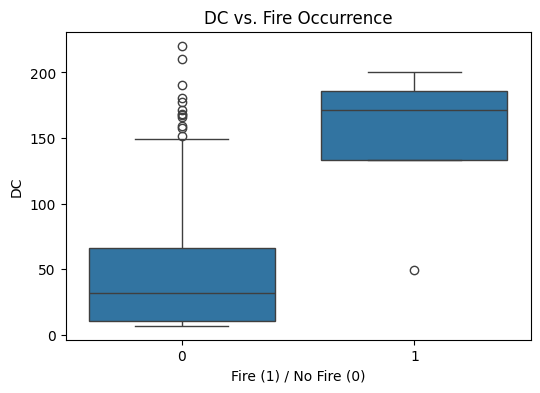

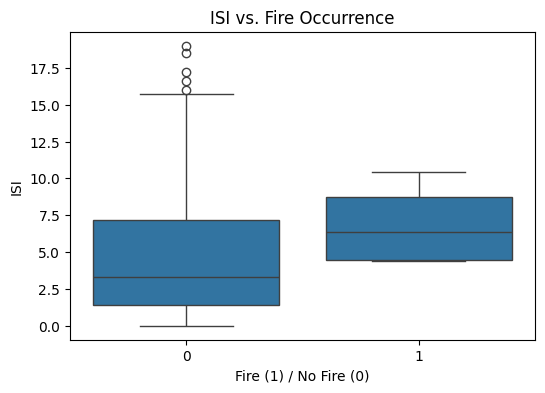

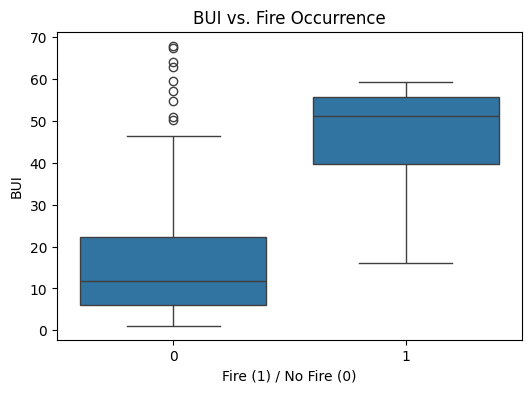

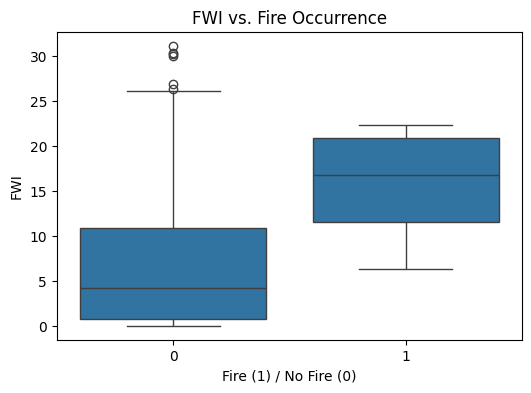

In [30]:

# 3. Relationship between Numerical Features and Fire Occurrence
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Classes', y=feature, data=df)
    plt.title(f'{feature} vs. Fire Occurrence')
    plt.xlabel('Fire (1) / No Fire (0)')
    plt.ylabel(feature)
    plt.show()


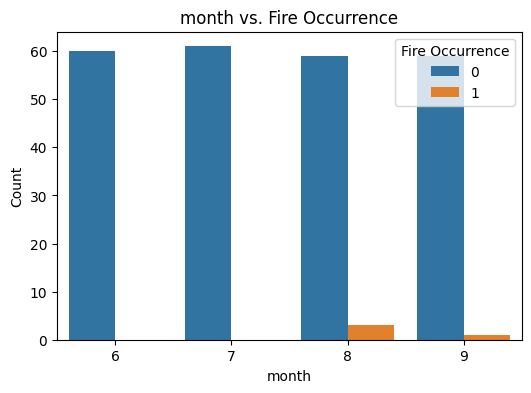

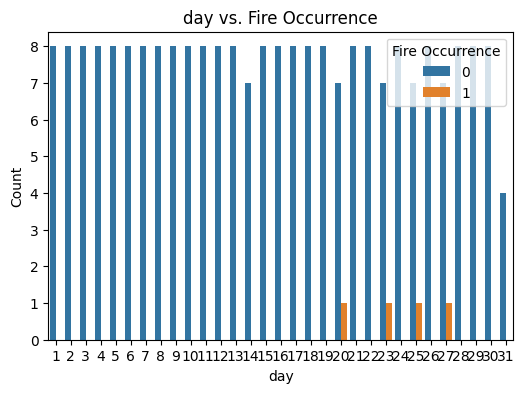

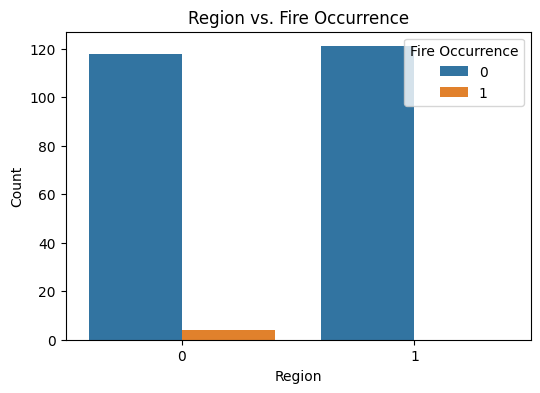

In [31]:

# 4. Relationship between Categorical Features and Fire Occurrence
categorical_features = ['month', 'day', 'Region']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Classes', data=df)
    plt.title(f'{feature} vs. Fire Occurrence')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Fire Occurrence')
    plt.show()

In [33]:
# Hypothesis Testing

# 1. Temperature and Fire Occurrence
# Null Hypothesis:  There is no difference in average temperature between fire and non-fire days.
# Alternative Hypothesis:  There is a difference in average temperature between fire and non-fire days.
temp_fire = df[df['Classes'] == 1]['Temperature']
temp_no_fire = df[df['Classes'] == 0]['Temperature']
t_statistic, p_value = stats.ttest_ind(temp_fire, temp_no_fire)
print(f"Temperature vs. Fire Occurrence: t-statistic = {t_statistic:.3f}, p-value = {p_value:.4f}")


Temperature vs. Fire Occurrence: t-statistic = 0.470, p-value = 0.6385


In [ ]:
# 2. Wind Speed and Fire Occurrence
# Null Hypothesis:  There is no difference in average wind speed between fire and non-fire days.
# Alternative Hypothesis:  There is a difference in average wind speed between fire and non-fire days.
ws_fire = df[df['Classes'] == 1]['Ws']
ws_no_fire = df[df['Classes'] == 0]['Ws']
t_statistic, p_value = stats.ttest_ind(ws_fire, ws_no_fire)
print(f"Wind Speed vs. Fire Occurrence: t-statistic = {t_statistic:.3f}, p-value = {p_value:.4f}")


In [ ]:
# 3. Month and Fire Occurrence
# Null Hypothesis:  Fire occurrence is independent of the month.
# Alternative Hypothesis:  Fire occurrence is dependent on the month.
observed = pd.crosstab(df['month'], df['Classes'])
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Month vs. Fire Occurrence: chi2-statistic = {chi2_statistic:.3f}, p-value = {p_value:.4f}")


In [ ]:
# 4. Region and Fire Occurrence
# Null Hypothesis:  Fire occurrence is independent of the region.
# Alternative Hypothesis:  Fire occurrence is dependent on the region.
observed = pd.crosstab(df['Region'], df['Classes'])
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Region vs. Fire Occurrence: chi2-statistic = {chi2_statistic:.3f}, p-value = {p_value:.4f}")


In [ ]:

# 5.  Fuel Characteristics (FFMC, DMC, DC) and Fire Occurrence
#  - Multiple Regression Analysis to see how these variables combinedly impact fire occurrence.
model = sm.ols('Classes ~ FFMC + DMC + DC', data=df)
results = model.fit()
print(results.summary())

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Classes', axis=1)
y = df['Classes']


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Feature Selection
# Select K best features using chi-squared test
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [ ]:

# Model Selection

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [ ]:

# Evaluate models using cross-validation
results = []
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_results.mean()))


In [ ]:

# Display model performance
print('Model Accuracy:')
for name, accuracy in results:
    print(f'{name}: {accuracy:.4f}')


In [ ]:

# Hyperparameter Tuning
# Select the best-performing model and tune hyperparameters using grid search
best_model_name, _ = max(results, key=lambda item: item[1])
best_model = models[best_model_name]


In [ ]:

# Define hyperparameter grid for tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'max_depth': [3, 5, 7, 9, None], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}


In [ ]:
grid = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='accuracy')
grid.fit(X_train_selected, y_train)


In [ ]:
# Print best parameters and accuracy
print(f'Best parameters for {best_model_name}: {grid.best_params_}')
print(f'Best accuracy for {best_model_name}: {grid.best_score_:.4f}')

# Model Training and Evaluation
# Train the best model with tuned hyperparameters
best_model = grid.best_estimator_
best_model.fit(X_train_selected, y_train)


In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test_selected)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Check Model Assumptions

# Check for multicollinearity
vif = [variance_inflation_factor(X_train_selected, i) for i in range(X_train_selected.shape[1])]
print('Variance Inflation Factors:')
print(vif)


In [ ]:
# Check for linearity
# Use scatter plots or residual plots to visualize linearity between features and target
for col in X_train_selected:
    plt.scatter(X_train_selected[col], y_train)
    plt.xlabel(col)
    plt.ylabel('Classes')
    plt.title(f'Scatter Plot of {col} vs. Classes')
    plt.show()

### 4. Conclusion

EDA Insights: Summarize your observations from the EDA plots.

Hypothesis Testing Results: Discuss the results of your hypothesis tests and their implications.

Model Performance: Report the accuracy of your chosen model and its performance on the test set.

Model Assumptions: Discuss any model assumptions and how you checked for them.

Future Work: Suggest potential areas for further exploration or improvement.

This analysis provides a starting point for understanding forest fire occurrences and developing prediction models. You can further enhance this analysis by incorporating more advanced techniques and features as needed.

Remember to adapt this code and analysis according to your specific data and research question.